In [225]:
import pandas as pd
from tensorflow import keras as ks
import numpy as np
from tensorflow.keras import Input
import tensorflow as tf

In [226]:
train = pd.read_csv('../data/split_data/train_stats.csv', index_col=0)
test = pd.read_csv('../data/split_data/test_stats.csv', index_col=0)
train.head()

,tension_index_int,mode_int,std_int,mean_int,var_int,pnn50_int,RMSSD_int,ivr_int,vpr_int,papr_int,...,y40,y41,y42,y43,y44,y45,y46,y47,y48,y49
0,1.464797e+08,0.227959,0.032626,0.243542,13.396406,0.0,0.038905,0.667826,20.925667,0.614147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.464797e+08,0.227959,0.032801,0.243854,13.451273,0.0,0.039181,0.667826,20.925667,0.614147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.464797e+08,0.227959,0.033088,0.244401,13.538579,0.0,0.039247,0.667826,20.925667,0.614147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.464797e+08,0.227959,0.033308,0.244818,13.605041,0.0,0.039266,0.667826,20.925667,0.614147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.464797e+08,0.227959,0.033349,0.244896,13.617806,0.0,0.039219,0.667826,20.925667,0.614147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [227]:
zero_train = train.copy()

for column in zero_train.iloc[:, -50:].columns:
    zero_train = zero_train.loc[zero_train[column] == 0]

zero_train

,tension_index_int,mode_int,std_int,mean_int,var_int,pnn50_int,RMSSD_int,ivr_int,vpr_int,papr_int,...,y40,y41,y42,y43,y44,y45,y46,y47,y48,y49
0,1.464797e+08,0.227959,0.032626,0.243542,13.396406,0.0,0.038905,0.667826,20.925667,0.614147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.464797e+08,0.227959,0.032801,0.243854,13.451273,0.0,0.039181,0.667826,20.925667,0.614147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.464797e+08,0.227959,0.033088,0.244401,13.538579,0.0,0.039247,0.667826,20.925667,0.614147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.464797e+08,0.227959,0.033308,0.244818,13.605041,0.0,0.039266,0.667826,20.925667,0.614147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.464797e+08,0.227959,0.033349,0.244896,13.617806,0.0,0.039219,0.667826,20.925667,0.614147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587,2.940869e+08,0.191317,0.076230,0.212161,35.930028,0.0,0.103340,1.125275,14.704346,2.090774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3588,2.940869e+08,0.191317,0.076249,0.212083,35.952514,0.0,0.103341,1.125275,14.704346,2.090774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3589,3.086048e+08,0.191432,0.076280,0.211953,35.988867,0.0,0.103343,1.181538,14.695466,2.193987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3590,3.231142e+08,0.191543,0.076310,0.211823,36.025153,0.0,0.103340,1.237802,14.687010,2.297140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [228]:
one_test = test.copy()

for column in one_test.iloc[:, -50:].columns:
    one_test = one_test.loc[one_test[column] == 0]
one_test

,tension_index_int,mode_int,std_int,mean_int,var_int,pnn50_int,RMSSD_int,ivr_int,vpr_int,papr_int,...,y40,y41,y42,y43,y44,y45,y46,y47,y48,y49
0,4.793620e+08,0.184861,0.029858,0.186016,16.051476,0.0,0.041820,1.772308,22.826760,2.271976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.791211e+08,0.184954,0.037261,0.189245,19.689084,0.0,0.053429,1.772308,22.815290,2.270834,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.790208e+08,0.184993,0.037243,0.189453,19.657941,0.0,0.048180,1.772308,22.810515,2.270359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.006937e+08,0.180393,0.042433,0.186745,22.722352,0.0,0.067617,1.445647,16.695570,2.660856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.006937e+08,0.180393,0.043855,0.185495,23.642073,0.0,0.066193,1.445647,16.695570,2.660856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,8.653761e+08,0.185118,0.046647,0.197005,23.677822,0.0,0.069843,3.203926,25.452238,3.673341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,8.653761e+08,0.185118,0.046633,0.197057,23.664546,0.0,0.069842,3.203926,25.452238,3.673341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436,8.400887e+08,0.185081,0.046603,0.197188,23.634071,0.0,0.069850,3.109693,25.457235,3.566002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
437,8.400887e+08,0.185081,0.046603,0.197187,23.634071,0.0,0.069842,3.109693,25.457235,3.566002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [229]:
test_copy = test.copy()
test_copy.drop(index=one_test.index, inplace=True)


In [258]:
r_r_series_input = Input(shape=50)
r_r_series_layer = ks.layers.Dense(128, 'tanh')(r_r_series_input)
r_r_series_layer = ks.layers.Dense(64, 'tanh')(r_r_series_layer)
r_r_series_layer = ks.layers.Dense(32, 'tanh')(r_r_series_layer)
r_r_series_layer = ks.layers.Dense(16, 'tanh')(r_r_series_layer)
r_r_series_model = ks.Model(inputs=r_r_series_input, outputs=r_r_series_layer)

time_series_input = Input(shape=12)
time_series_layer = ks.layers.Dense(16, 'tanh')(time_series_input)
time_series_layer = ks.layers.Dense(32, 'tanh')(time_series_layer)
time_series_model = ks.Model(inputs=time_series_input, outputs=time_series_layer)

concatenate_layer = ks.layers.concatenate(inputs=[r_r_series_model.output,
                                                  time_series_model.output])

r_r_series_decoder_layer = ks.layers.Dense(32, 'tanh')(concatenate_layer)
r_r_series_decoder_layer = ks.layers.Dense(64, 'tanh')(r_r_series_decoder_layer)
r_r_series_decoder_layer = ks.layers.Dense(128, 'tanh')(r_r_series_decoder_layer)
r_r_series_decoder_layer = ks.layers.Dense(50, 'sigmoid')(r_r_series_decoder_layer)

r_r_series_model = ks.Model(inputs=[r_r_series_model.input,
                                    time_series_model.input],
                            outputs=r_r_series_decoder_layer)

In [259]:
r_r_series_model.compile(optimizer='adam',
                         loss='mae',
                         metrics='mae')

In [260]:
r_r_series_model.fit(batch_size=16,
                     x=[zero_train.iloc[:, 24:-50],
                        zero_train.iloc[:, 12:24]],
                     y=zero_train.iloc[:, 24:-50],
                     validation_data=([test_copy.iloc[:, 24:-50],
                                       test_copy.iloc[:, 12:24]],
                                      test_copy.iloc[:, 24:-50]),
                     epochs=20)

Epoch 1/20
136/136 [==============================] - 3s 10ms/step - loss: 0.0788 - mae: 0.0788 - val_loss: 0.0258 - val_mae: 0.0258

In [261]:
pred = r_r_series_model.predict([test_copy.iloc[:, 24:-50], test_copy.iloc[:, 12:24]])

In [262]:
a = ((pred.reshape(1, -1)[0] / test_copy.iloc[:, 24:-50].values.reshape(1, -1)[0]) * 100)

In [263]:
np.arange(0, len(a), 1)

array([    0,     1,     2, ..., 10397, 10398, 10399])

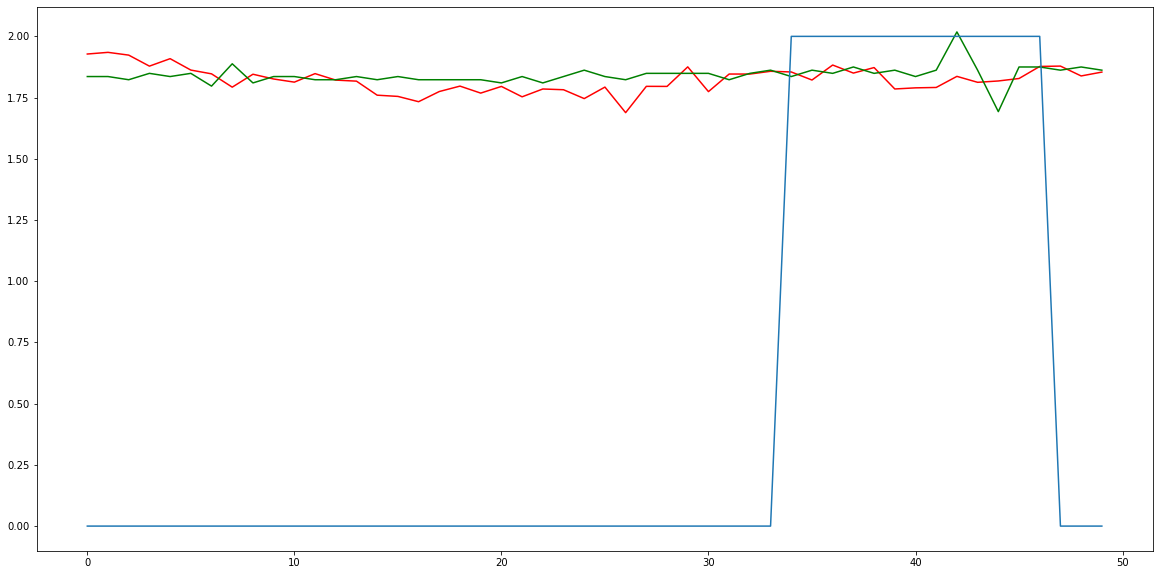

In [264]:
chel = 15
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(np.arange(0, 50), pred[chel] * 10, c='r')
plt.plot(np.arange(0, 50), test_copy.iloc[chel, 24:74].values.reshape(1, -1)[0] * 10, c='g')
plt.plot(np.arange(0, 50), test_copy.iloc[chel, 74:].values.reshape(1, -1)[0]*2)

#plt.plot(np.arange(0, 1100, 1), test_copy.loc[:10, 'y0':].values.reshape(1, -1)[0] * 1000)
plt.savefig('another_test.png')

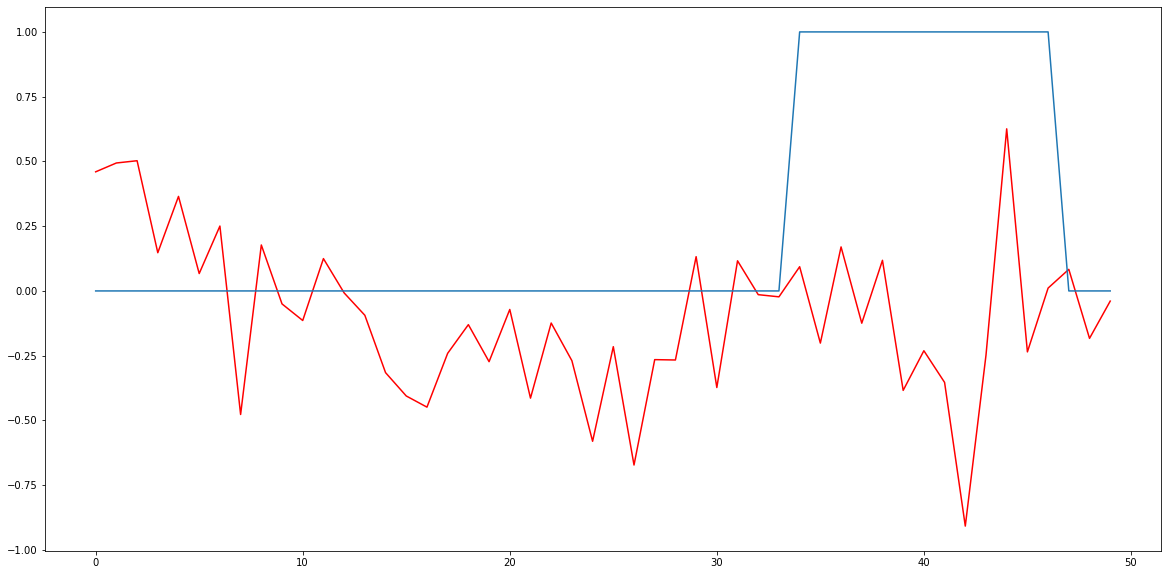

In [265]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(0, 50), (pred[chel] - test_copy.iloc[chel, 24:74].values.reshape(1, -1)[0]) * 50, c='r')
plt.plot(np.arange(0, 50), test_copy.iloc[chel, 74:].values.reshape(1, -1)[0])

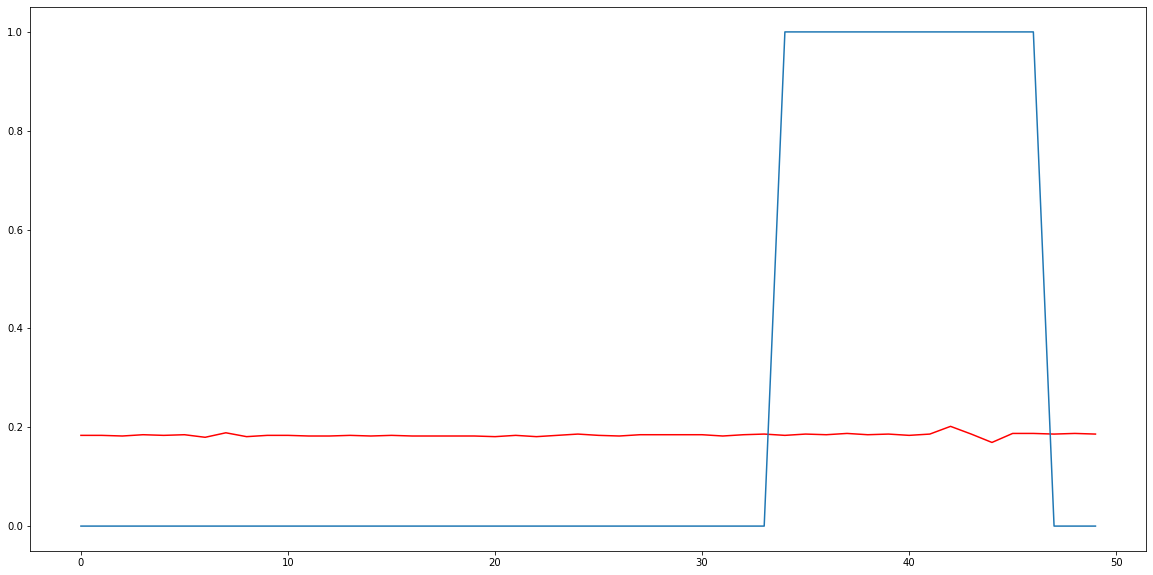

In [266]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(0, 50), ( test_copy.iloc[chel, 24:74].values.reshape(1, -1)[0]) , c='r')
plt.plot(np.arange(0, 50), test_copy.iloc[chel, 74:].values.reshape(1, -1)[0])


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score

In [ ]:
f1_score(y_true=test.iloc[:, 20:-100].values.reshape(1,-1)[0], y_pred=pred.reshape(1,-1)[0], average='micro')

In [ ]:
confusion_matrix(y_true=test.iloc[:, 20:-100].values.reshape(1,-1)[0], y_pred=pred.reshape(1,-1)[0])